In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use(style='ggplot')
#ggplot is a style of plotting with matplotlib
from sklearn.model_selection import train_test_split

In [27]:
training_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
training_dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [28]:
training_dataset.shape

(1460, 81)

In [29]:
training_dataset.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

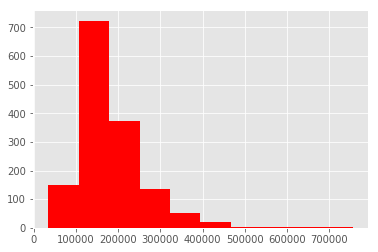

In [30]:
plt.hist(training_dataset.SalePrice, color= 'red')

In [31]:
training_dataset.SalePrice.mean()

180921.19589041095

In [55]:
training_dataset.SalePrice.max(), training_dataset.SalePrice.min()

(755000, 34900)

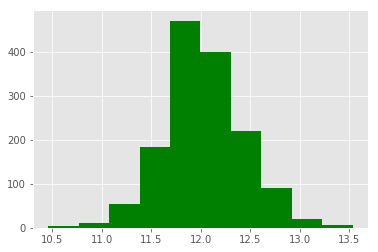

In [33]:
#we make a distribution more gaussian by taking the log of such dataset.
gauss = np.log(training_dataset.SalePrice)
plt.hist(gauss, color = 'green')
plt.show()

In [38]:
###next, extract numeric features because someof the features could be
#discrete values 1,2, toronto etc, or continous values i.e 2.2,2.3 3tc
numeric_features = training_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [40]:
#Correlating the features with the output(salesprice)
#shows that OverallQual is the closest
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[:-5])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
ScreenPorch     0.111447
PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
Name: SalePrice, dtyp

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

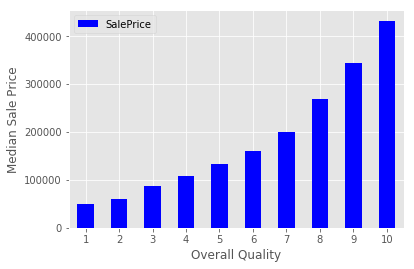

In [42]:
#Plotting for overall quality and saleprice together
#Worthy to note that the overall quality increases with the Median sale price
quality_pivot = training_dataset.pivot_table(index= 'OverallQual',
                                            values= 'SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)


Text(0.5, 0, 'Above grade (ground) living area square feet')

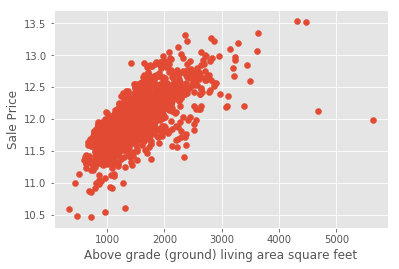

In [46]:
#using scatter plot
plt.scatter(x= training_dataset['GrLivArea'], y=np.log(training_dataset['SalePrice']))
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')

Text(0.5, 0, 'Garage Area')

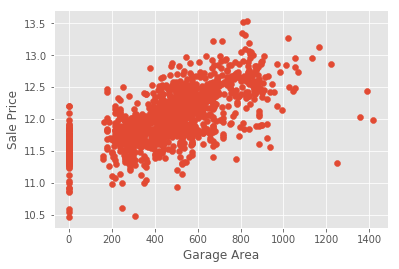

In [48]:
#Useful for detecting outliers which is very improtant remove to have a good ML model
plt.scatter(x= training_dataset['GarageArea'], y=np.log(training_dataset.SalePrice))
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

Text(0.5, 0, 'Garage Area')

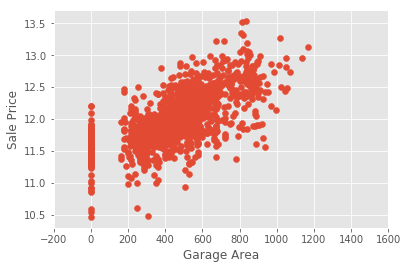

In [50]:
#removing outliers < 1200 slices the Garage area to below 1200
training_dataset = training_dataset[training_dataset['GarageArea'] < 1200]
plt.scatter(x = training_dataset['GarageArea'], y= np.log(training_dataset.SalePrice))
plt.xlim(-200,1600) #forces the same scale before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

In [53]:
training_dataset.GarageArea.min(), training_dataset.GarageArea.max()

(0, 1166)

In [64]:
#checking nullvalues count
null = pd.DataFrame(training_dataset.isnull.sum().sort_values(ascending=False)[:25])
null.columns = ['Null Count']
null.index.name = 'Feature'
null

AttributeError: 'function' object has no attribute 'sum'

In [66]:
#counting categories/features
categories = training_dataset.select_dtypes(exclude =[np.number])
categories.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


In [67]:
#Handling missing values we use interpolate and it uses the average value for
#that feature to the missing value
data = training_dataset.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)

0

In [68]:
y = np.log(training_dataset.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis = 1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42,test_size=0.3)

In [77]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)

In [85]:
print ('R^2' '\n', model.score(x_test,y_test))
prediction = model.predict(x_test)
print ('Root Mean square error is' '\n', mean_squared_error(y_test,prediction))

R^2
 0.8869656651210623
Root Mean square error is
 0.017476962537430137


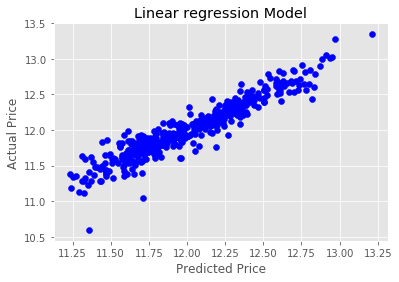

In [91]:
actual_values = y_test
plt.scatter(prediction, actual_values, color='b')
#alpha helps to ahow overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear regression Model')
plt.show()

#tells us how much data is close to the Linear regression line

In [97]:
submission = pd.DataFrame()
submission['Id'] = test_dataset.Id
features = test_dataset.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
prediction = model.predict(features)
final_prediction = np.exp(prediction)
print('Original Predictions are: \n', prediction[:5], "\n")
print('Final Predictions are: \n', final_prediction[:5])
submission['SalePrice']=final_prediction
submission.head()

Original Predictions are: 
 [11.75216637 11.68264233 12.07375513 12.2077155  12.11156514] 

Final Predictions are: 
 [127028.45212689 118496.93021766 175212.55661694 200328.84028161
 181964.18121496]


,Id,SalePrice
0,1461,127028.452127
1,1462,118496.930218
2,1463,175212.556617
3,1464,200328.840282
4,1465,181964.181215


In [98]:
submission.to_csv('Housing dataset1 sub.csv', index=False)